# 맵플롯립 Matplotlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus']=False

if platform.system() == 'Windows':
    # 윈도우즈인 경우
    rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else:
    print('Unknown system...')

In [4]:
import matplotlib
matplotlib.__version__

'3.10.0'

## 지원 되는 플롯 유형

- 선그래프(line plot) : plot()
- 막대그래프(bar chart) : bar(), barh()
- 산점도(scatter plot) : scatter() 
- 히스토그램(histogram) : hist()
- 상자그림표(box plot) : boxplot()
- 원그래프(pie chart) : pie()
- 기타 다양한 유형의 차트/플롯을 지원
- https://matplotlib.org/stable/plot_types/index.html

## 1. 막대그래프 : bar(), barh(), df.plot()

### 1-1. 세로 막대 그래프 그리기: bar()
- bar(x,y,color=[],alpha=)
    - color = [] : 색상값 설정
    - alpha = 투명도 설정

matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)


https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

#### 데이터셋

In [7]:
dust = pd.read_excel('data/fine_dust.xlsx', index_col='area')
dust.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, Seoul to Jeju
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2001    14 non-null     float64
 1   2002    14 non-null     float64
 2   2003    14 non-null     float64
 3   2004    14 non-null     float64
 4   2005    14 non-null     float64
 5   2006    14 non-null     int64  
 6   2007    14 non-null     int64  
 7   2008    14 non-null     float64
 8   2009    14 non-null     float64
 9   2010    14 non-null     float64
 10  2011    14 non-null     int64  
 11  2012    14 non-null     float64
 12  2013    14 non-null     float64
 13  2014    14 non-null     float64
 14  2015    14 non-null     float64
 15  2016    14 non-null     float64
 16  2017    14 non-null     float64
 17  2018    14 non-null     float64
 18  2019    14 non-null     float64
dtypes: float64(16), int64(3)
memory usage: 2.2+ KB


#### 막대그래프

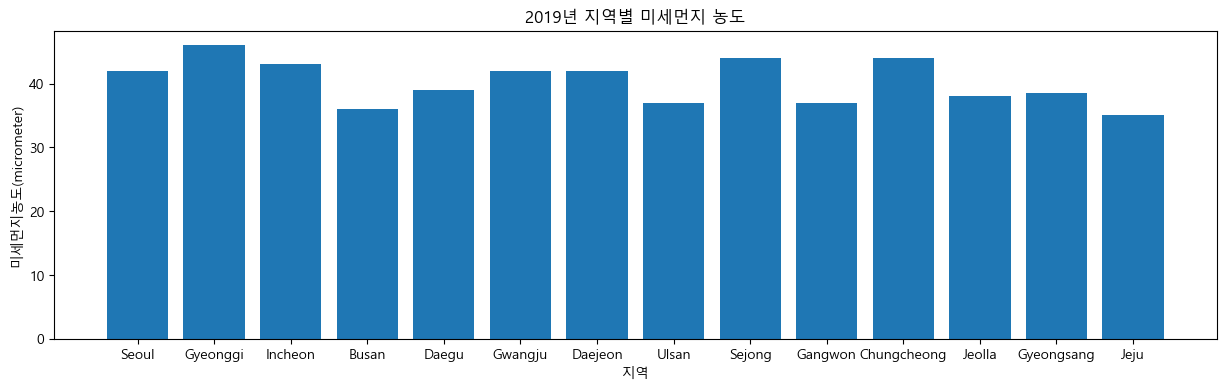

In [9]:
plt.figure(figsize=(15,4))
plt.bar(dust.index, dust[2019])
plt.title('2019년 지역별 미세먼지 농도')
plt.xlabel('지역')
plt.ylabel('미세먼지농도(micrometer)')
plt.show()

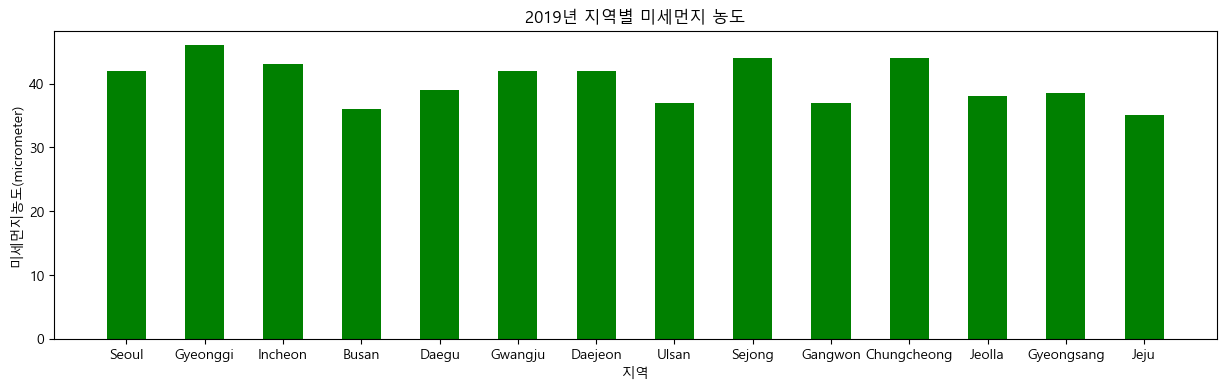

In [10]:
plt.figure(figsize=(15,4))
plt.bar(dust.index, dust[2019], width=0.5, color='g')
plt.title('2019년 지역별 미세먼지 농도')
plt.xlabel('지역')
plt.ylabel('미세먼지농도(micrometer)')
plt.show()

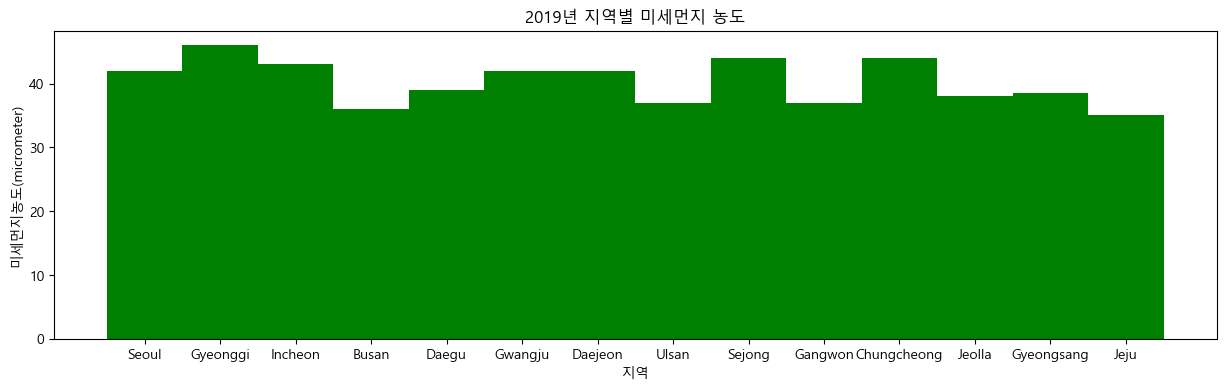

In [11]:
plt.figure(figsize=(15,4))
plt.bar(dust.index, dust[2019], width=1, color='g')
plt.title('2019년 지역별 미세먼지 농도')
plt.xlabel('지역')
plt.ylabel('미세먼지농도(micrometer)')
plt.show()

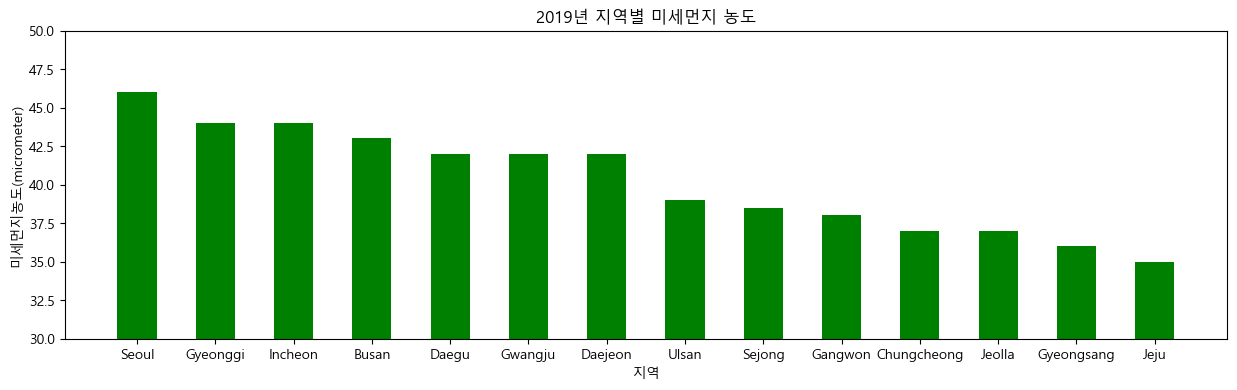

In [18]:
data = dust[2019].sort_values(ascending=False)
plt.figure(figsize=(15,4))
plt.bar(dust.index, data, width=0.5, color='g')
plt.title('2019년 지역별 미세먼지 농도')
plt.xlabel('지역')
plt.ylabel('미세먼지농도(micrometer)')
plt.ylim(30,50)
plt.show()

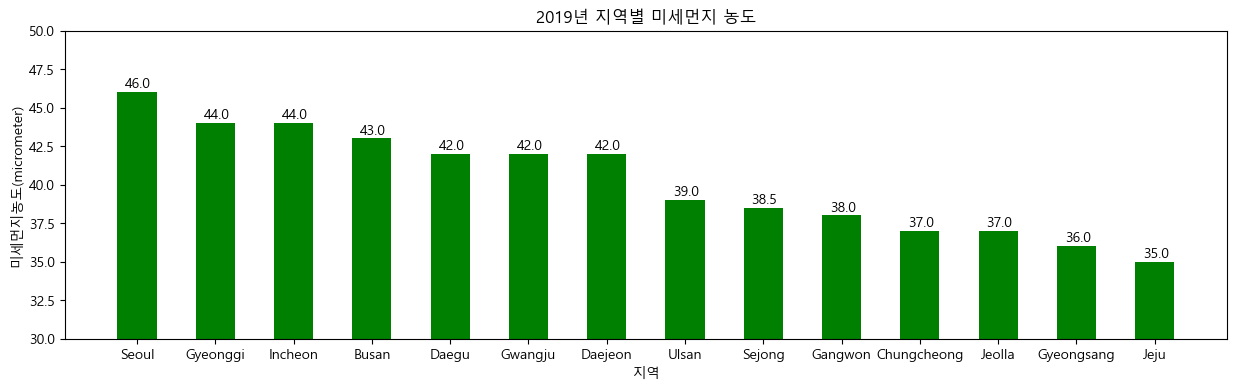

In [21]:
data = dust[2019].sort_values(ascending=False)
plt.figure(figsize=(15,4))
plt.bar(dust.index, data, width=0.5, color='g')
plt.title('2019년 지역별 미세먼지 농도')
plt.xlabel('지역')
plt.ylabel('미세먼지농도(micrometer)')
plt.ylim(30,50)
for i in range(data.shape[0]):
    y = data.iloc[i]
    plt.text(i-0.15, y+0.3, y)
plt.show()

In [22]:
data = dust.loc[:, 2018:2019]
data.head()

,2018,2019
area,,
Seoul,40.0,42.0
Gyeonggi,44.0,46.0
Incheon,40.0,43.0
Busan,41.0,36.0
Daegu,39.0,39.0


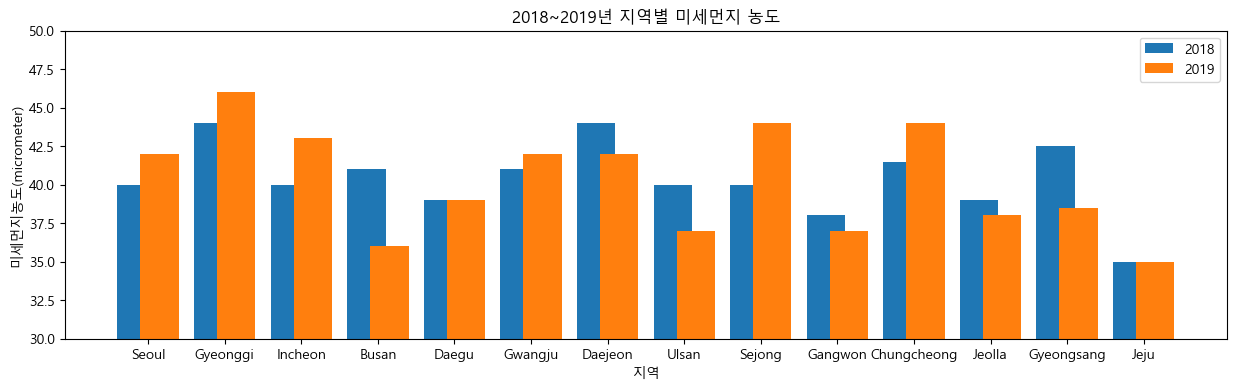

In [25]:
x = np.arange(data.shape[0])
plt.figure(figsize=(15,4))
plt.bar(x, data[2018], width=0.5, label='2018')
plt.bar(x+0.3, data[2019], width=0.5, label='2019')
plt.title('2018~2019년 지역별 미세먼지 농도')
plt.xlabel('지역')
plt.ylabel('미세먼지농도(micrometer)')
plt.ylim(30,50)
plt.xticks(x+0.15, data.index)
plt.legend()
plt.show()

In [26]:
data = dust.loc[:'Daegu', 2016:2019]
data

,2016,2017,2018,2019
area,,,,
Seoul,48.0,44.0,40.0,42.0
Gyeonggi,53.0,51.0,44.0,46.0
Incheon,49.0,46.0,40.0,43.0
Busan,44.0,44.0,41.0,36.0
Daegu,43.0,42.0,39.0,39.0


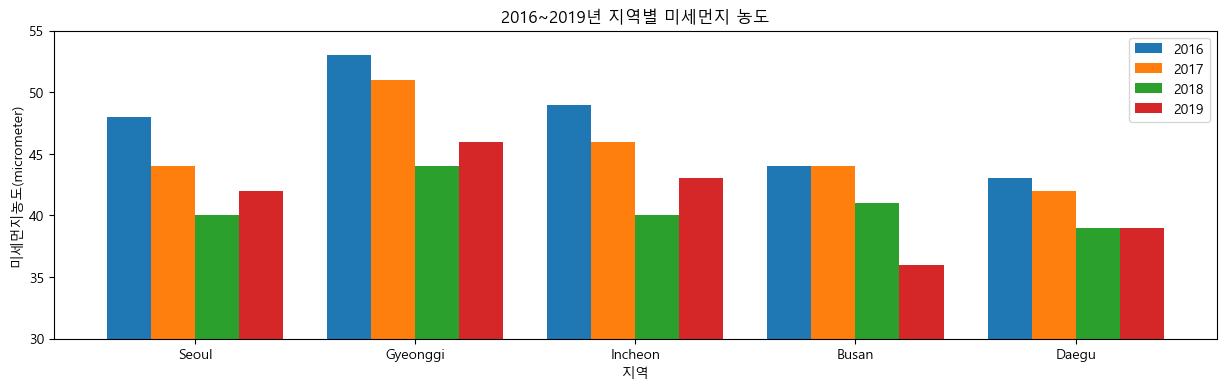

In [34]:
x = np.arange(data.shape[0])
plt.figure(figsize=(15,4))
for year in data.columns:
    plt.bar(x, data[year], width=0.2, label=year)
    x = x + 0.2
    
plt.title('2016~2019년 지역별 미세먼지 농도')
plt.xlabel('지역')
plt.ylabel('미세먼지농도(micrometer)')
plt.ylim(30,55)
plt.xticks(x-0.5, data.index)
plt.legend()
plt.show()

### 1-2. 가로 막대 그래프 그리기 : barh()

- barh(x, width, color=[], alpha=)

matplotlib.pyplot.barh(y, width, height=0.8, left=None, *, align='center', data=None, **kwargs)

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html

#### 데이터셋

In [35]:
dust

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
area,,,,,,,,,,,,,,,,,,,
Seoul,71.0,76.0,69.0,61.0,58.0,60,61,55.0,54.0,49.0,47,41.0,45.0,46.0,45.0,48.0,44.0,40.0,42.0
Gyeonggi,71.0,74.0,68.0,67.0,65.0,68,66,60.0,60.0,58.0,56,49.0,54.0,54.0,53.0,53.0,51.0,44.0,46.0
Incheon,52.0,57.0,61.0,62.0,61.0,68,64,57.0,60.0,55.0,55,47.0,49.0,49.0,53.0,49.0,46.0,40.0,43.0
Busan,60.0,69.0,55.0,60.0,58.0,59,57,51.0,49.0,49.0,47,43.0,49.0,48.0,46.0,44.0,44.0,41.0,36.0
Daegu,67.0,71.0,59.0,0.0,55.0,54,53,57.0,48.0,51.0,47,42.0,45.0,45.0,46.0,43.0,42.0,39.0,39.0
Gwangju,57.0,52.0,36.0,46.0,49.0,55,52,50.0,46.0,45.0,43,38.0,42.0,41.0,43.0,40.0,40.0,41.0,42.0
Daejeon,48.0,53.0,43.0,49.0,48.0,49,49,45.0,43.0,44.0,44,39.0,42.0,41.0,46.0,44.0,45.0,44.0,42.0
Ulsan,0.0,54.0,40.0,50.0,50.0,52,53,54.0,49.0,48.0,49,46.0,47.0,46.0,46.0,43.0,43.0,40.0,37.0
Sejong,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,46.0,47.0,40.0,44.0


#### 가로막대그래프

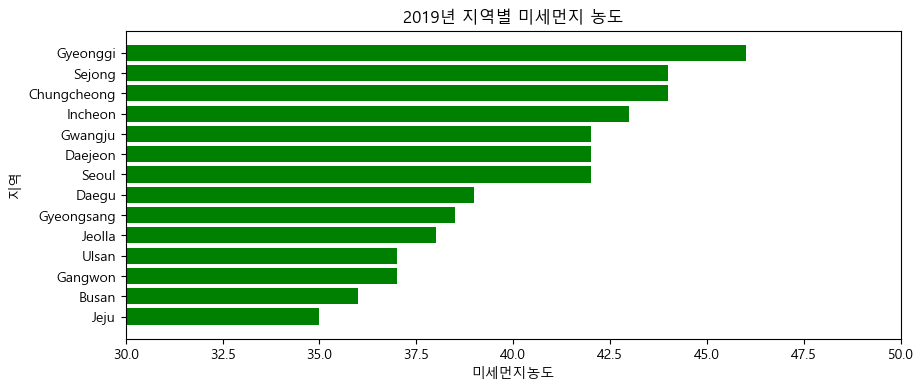

In [37]:
data = dust[2019].sort_values()
plt.figure(figsize=(10,4))
plt.barh(data.index, data, color='g')
plt.title('2019년 지역별 미세먼지 농도')
plt.xlabel('미세먼지농도')
plt.ylabel('지역')
plt.xlim(30, 50)
plt.show()

- 막대 옆에 값 출력하기

In [52]:
data.index

Index(['Jeju', 'Busan', 'Gangwon', 'Ulsan', 'Jeolla', 'Gyeongsang', 'Daegu',
       'Seoul', 'Daejeon', 'Gwangju', 'Incheon', 'Chungcheong', 'Sejong',
       'Gyeonggi'],
      dtype='object', name='area')

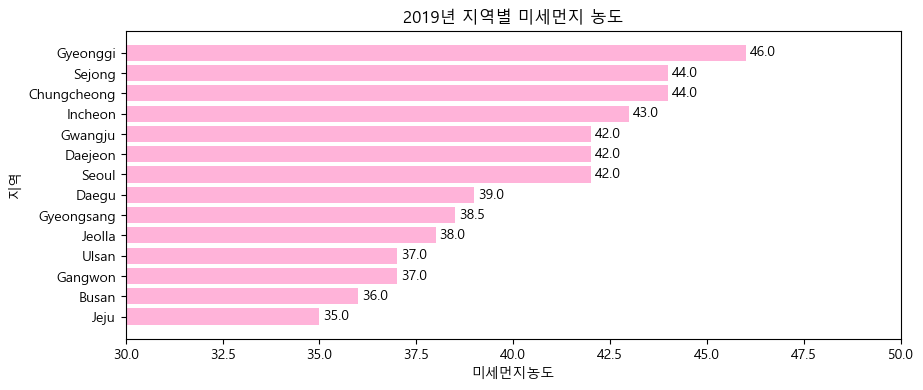

In [56]:
data = dust[2019].sort_values()
plt.figure(figsize=(10,4))
plt.barh(data.index, data, color='hotpink', alpha=0.5)
plt.title('2019년 지역별 미세먼지 농도')
plt.xlabel('미세먼지농도')
plt.ylabel('지역')
plt.xlim(30, 50)
for i in range(data.shape[0]):
    y = data.iloc[i]
    plt.text(y+0.1, i-0.15, y)
plt.show()

### 1-3. 데이터프레임으로 막대그래프 그리기

- **데이터프레임.plot**(kind=그래프종류, grid=T/F, figsize=그래프크기)
- **plt.bar**(데이터프레임.변수1, 데이터프레임.변수2)
- **plt.barh**(데이터프레임.변수1, 데이터프레임.변수2)

**데이터프레임.plot()으로 막대그래프 그리기**

- plt.xticks()의 rotation 인수에 따라 가로형 또는 세로형 막대그래프 생성
    - plt.xticks(ticks=None, labels=None, **kwargs)
    - plt.xticks(ticks=None, labels=None) : vertical 기본
    - plt.xticks(ticks=None, labels=None, rotation='vertical') : 가로형막대
    - plt.xticks(ticks=None, labels=None, rotation='horizontal') : 세로형막대

#### 데이터셋

In [57]:
dust

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
area,,,,,,,,,,,,,,,,,,,
Seoul,71.0,76.0,69.0,61.0,58.0,60,61,55.0,54.0,49.0,47,41.0,45.0,46.0,45.0,48.0,44.0,40.0,42.0
Gyeonggi,71.0,74.0,68.0,67.0,65.0,68,66,60.0,60.0,58.0,56,49.0,54.0,54.0,53.0,53.0,51.0,44.0,46.0
Incheon,52.0,57.0,61.0,62.0,61.0,68,64,57.0,60.0,55.0,55,47.0,49.0,49.0,53.0,49.0,46.0,40.0,43.0
Busan,60.0,69.0,55.0,60.0,58.0,59,57,51.0,49.0,49.0,47,43.0,49.0,48.0,46.0,44.0,44.0,41.0,36.0
Daegu,67.0,71.0,59.0,0.0,55.0,54,53,57.0,48.0,51.0,47,42.0,45.0,45.0,46.0,43.0,42.0,39.0,39.0
Gwangju,57.0,52.0,36.0,46.0,49.0,55,52,50.0,46.0,45.0,43,38.0,42.0,41.0,43.0,40.0,40.0,41.0,42.0
Daejeon,48.0,53.0,43.0,49.0,48.0,49,49,45.0,43.0,44.0,44,39.0,42.0,41.0,46.0,44.0,45.0,44.0,42.0
Ulsan,0.0,54.0,40.0,50.0,50.0,52,53,54.0,49.0,48.0,49,46.0,47.0,46.0,46.0,43.0,43.0,40.0,37.0
Sejong,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,46.0,47.0,40.0,44.0


#### 막대그래프

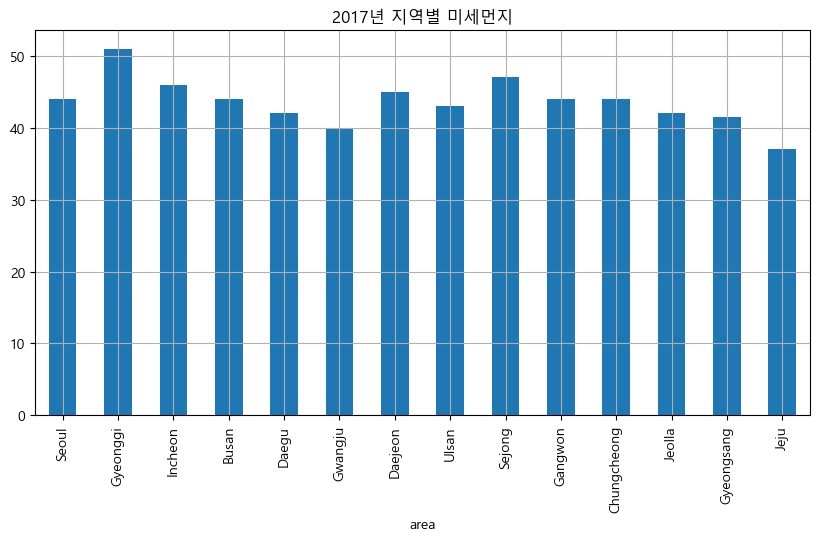

In [58]:
data = dust[2017]
data.plot(kind='bar', grid=True, figsize=(10,5), title='2017년 지역별 미세먼지')
plt.show()

**데이터프레임.plot()를 이용하여 묶음 막대그래프 그리기**
- 그래프를 그리기 위한 데이터를 지정하지 않는 경우
- 데이터프레임에 있는 모든 수치데이터를 이용하여 묶음 막대그래프를 그림

#### 데이터셋

In [59]:
data = dust.loc['Seoul':'Daegu', 2017:2020]
data

,2017,2018,2019
area,,,
Seoul,44.0,40.0,42.0
Gyeonggi,51.0,44.0,46.0
Incheon,46.0,40.0,43.0
Busan,44.0,41.0,36.0
Daegu,42.0,39.0,39.0


#### 묶음 막대그래프

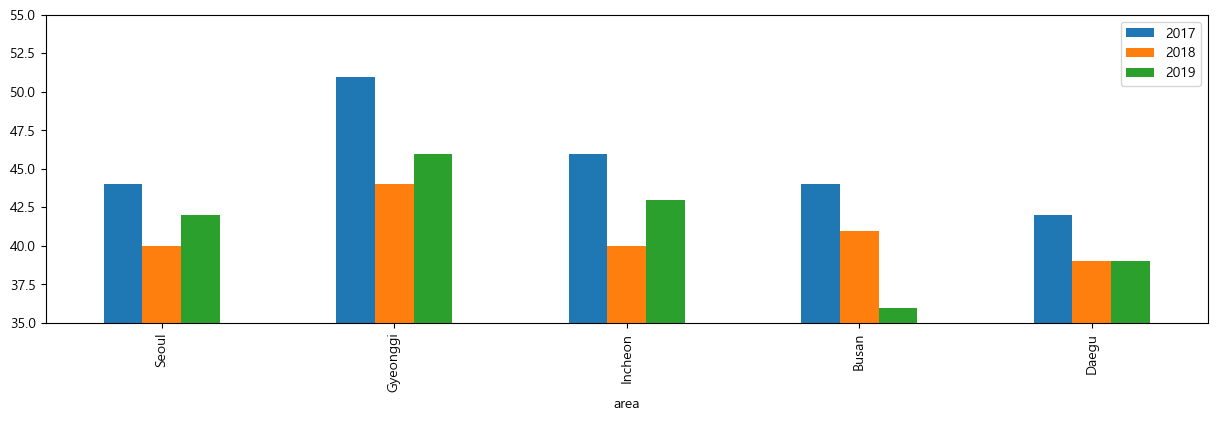

In [64]:
data.plot.bar(figsize=(15,4))
plt.ylim(35,55)
plt.show()

**plt.bar(데이터프레임)를 이용하여 막대그래프 그리기**

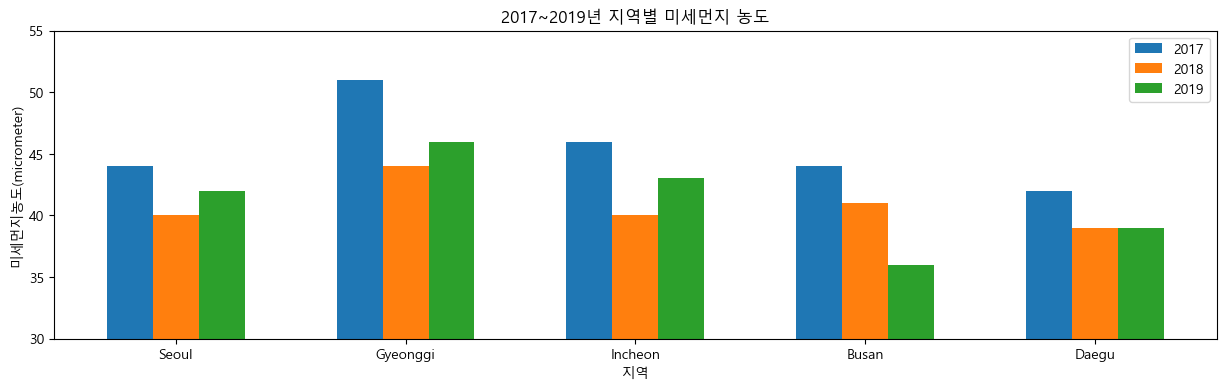

In [72]:
x = np.arange(data.shape[0])
plt.figure(figsize=(15,4))
for year in data.columns:
    plt.bar(x, data[year], width=0.2, label=year)
    x = x + 0.2
    
plt.title('2017~2019년 지역별 미세먼지 농도')
plt.xlabel('지역')
plt.ylabel('미세먼지농도(micrometer)')
plt.ylim(30,55)
plt.xticks(x-0.4, data.index)
plt.legend()
plt.show()

**데이터프레임의 일부 필드를 데이터프레임으로 추출하여 그래프 작성**

In [74]:
data2 = data.sort_values(2019, ascending=False)
data2

,2017,2018,2019
area,,,
Gyeonggi,51.0,44.0,46.0
Incheon,46.0,40.0,43.0
Seoul,44.0,40.0,42.0
Daegu,42.0,39.0,39.0
Busan,44.0,41.0,36.0


**정렬된 데이터를 이용하여 막대그래프 그리기**

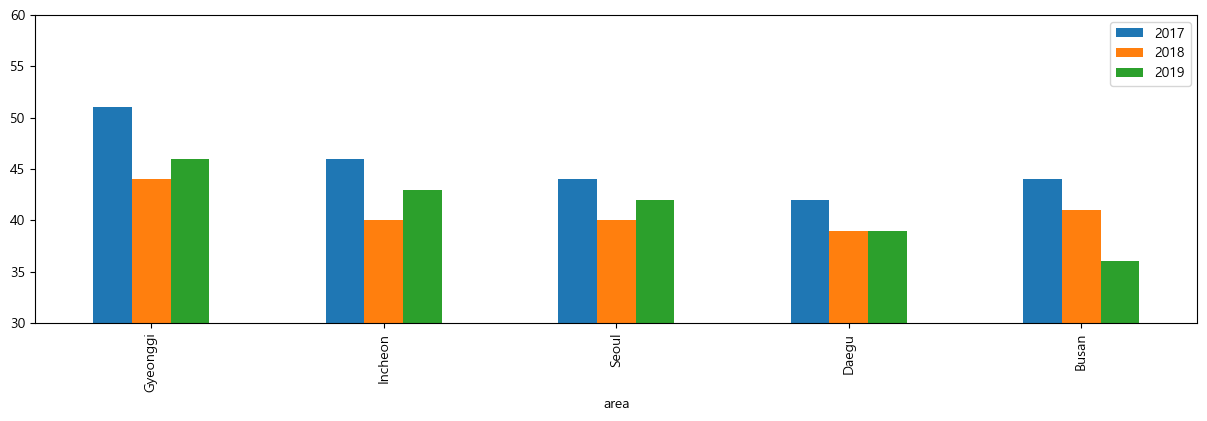

In [75]:
data2.plot(kind='bar', figsize=(15,4))
plt.ylim(30,60)
plt.show()

## 2. 산점도(scatter plot) : scatter()

- 두 수치형 변수간의 관계를 나타내기 위해 사용하는 그래프
    - 상관관계 표현 : 선형성
- 기능
    - 두 변수의 선형성
    - 이상치 탐지
    - 데이터의 그룹 파악 

- 형식 : matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)


https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

#### 데이터 생성

In [4]:
# 2022년 건강검진 데이터
health = pd.read_csv('data/health_screenings_2022_1000ea.csv', encoding='utf-8')
health.head()

,year,city_code,gender,age_code,height,weight,waist,eye_left,eye_right,hear_left,...,urine_protein,serum,AST,ALT,GTP,smoking,drinking,oral_check,dental_caries,tartar
0,2022,11,1,9,165,60,75.0,1.0,1.2,1.0,...,1.0,1.0,23.0,13.0,14.0,2.0,1.0,0,NaN,NaN
1,2022,11,2,13,155,60,88.0,0.8,1.0,1.0,...,1.0,0.6,17.0,18.0,13.0,1.0,0.0,0,NaN,NaN
2,2022,31,2,13,150,50,73.6,0.7,0.6,1.0,...,1.0,0.8,14.0,9.0,12.0,1.0,0.0,1,0.0,0.0
3,2022,41,1,17,165,55,78.0,0.8,0.8,1.0,...,1.0,1.1,19.0,13.0,10.0,2.0,0.0,0,NaN,NaN
4,2022,41,1,15,160,50,71.0,1.0,0.8,1.0,...,1.0,1.6,17.0,9.0,12.0,1.0,1.0,0,NaN,NaN


In [5]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           1000 non-null   int64  
 1   city_code      1000 non-null   int64  
 2   gender         1000 non-null   int64  
 3   age_code       1000 non-null   int64  
 4   height         1000 non-null   int64  
 5   weight         1000 non-null   int64  
 6   waist          1000 non-null   float64
 7   eye_left       1000 non-null   float64
 8   eye_right      1000 non-null   float64
 9   hear_left      1000 non-null   float64
 10  hear_right     1000 non-null   float64
 11  systolic       993 non-null    float64
 12  diastolic      993 non-null    float64
 13  blood_sugar    993 non-null    float64
 14  cholesterol    409 non-null    float64
 15  triglycerides  409 non-null    float64
 16  HDL            409 non-null    float64
 17  LDL            405 non-null    float64
 18  hemoglobi

#### 산점도 그리기

- 키와 몸무게

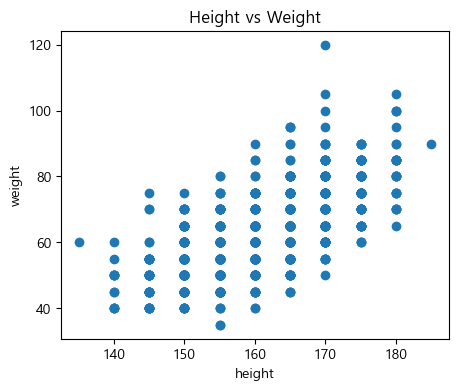

In [6]:
# 키와 몸무게

plt.figure(figsize=(5,4))
plt.scatter(health.height, health.weight)
plt.xlabel('height')
plt.ylabel('weight')
plt.title('Height vs Weight')
plt.show()

- 키와 허리둘레

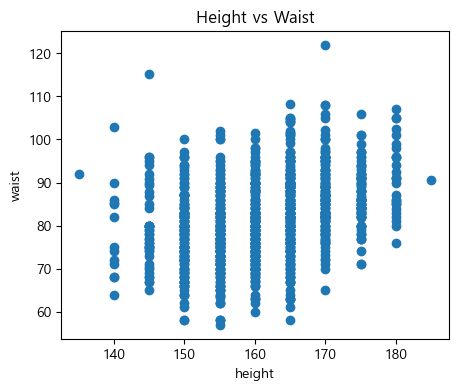

In [7]:
# 키와 허리둘레
plt.figure(figsize=(5,4))
plt.scatter(health.height, health.waist)
plt.xlabel('height')
plt.ylabel('waist')
plt.title('Height vs Waist')
plt.show()

- 수축기혈압과 이완기혈압

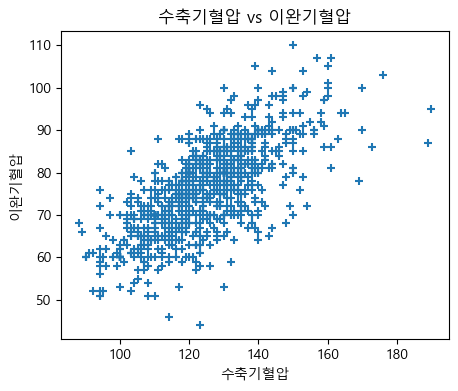

In [14]:
plt.figure(figsize=(5,4))
plt.scatter(health.systolic, health.diastolic, marker='+')
plt.xlabel('수축기혈압')
plt.ylabel('이완기혈압')
plt.title('수축기혈압 vs 이완기혈압')
plt.show()

### 산점도의 marker 변경

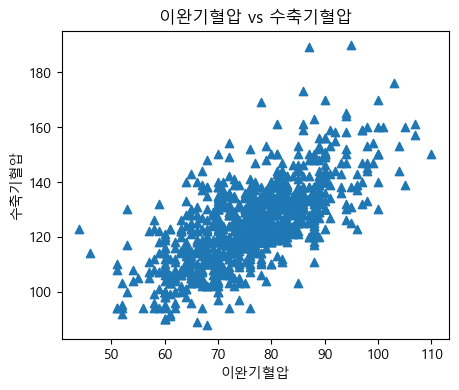

In [17]:
plt.figure(figsize=(5,4))
plt.scatter(y=health.systolic, x=health.diastolic, marker='^')
plt.ylabel('수축기혈압')
plt.xlabel('이완기혈압')
plt.title('이완기혈압 vs 수축기혈압')
plt.show()

#### scatter()의 c인수 사용

In [19]:
health.gender.unique()

array([1, 2])

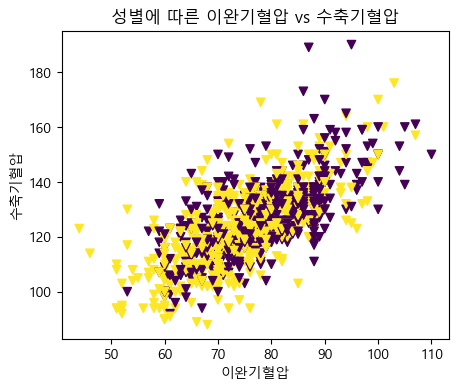

In [20]:
plt.figure(figsize=(5,4))
plt.scatter(y=health.systolic, x=health.diastolic, marker='v',
           c=health.gender)
plt.ylabel('수축기혈압')
plt.xlabel('이완기혈압')
plt.title('성별에 따른 이완기혈압 vs 수축기혈압')
plt.show()

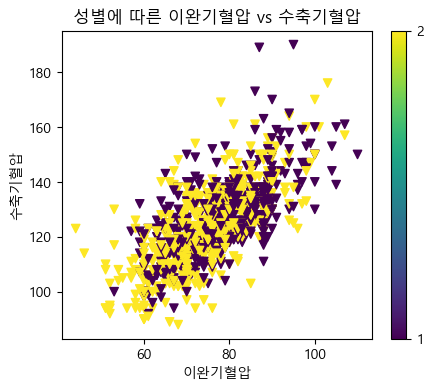

In [22]:
plt.figure(figsize=(5,4))
plt.scatter(y=health.systolic, x=health.diastolic, marker='v',
           c=health.gender)
plt.colorbar(ticks=[1,2])
plt.ylabel('수축기혈압')
plt.xlabel('이완기혈압')
plt.title('성별에 따른 이완기혈압 vs 수축기혈압')
plt.show()

### 버블차트
- 점의 크기와 색상을 이용하여 서로 다른 데이터 값을 표시하는 그래프
- scatter(c, s)를 이용하여 작성
    - s 인수 : size
    - c 인수 : color

In [25]:
n = 50
np.random.seed(0)
x = np.random.rand(n)
y1 = np.random.rand(n)
y2 = np.random.rand(n)
y3 = np.pi * (15* np.random.rand(n))**2

In [28]:
data = pd.DataFrame({'x':x, 'y1':y1, 'y2':y2, 'y3':y3})
data.head()

,x,y1,y2,y3
0,0.548814,0.570197,0.677817,15.787537
1,0.715189,0.438602,0.270008,532.718740
2,0.602763,0.988374,0.735194,18.663855
3,0.544883,0.102045,0.962189,267.838225
4,0.423655,0.208877,0.248753,10.837120


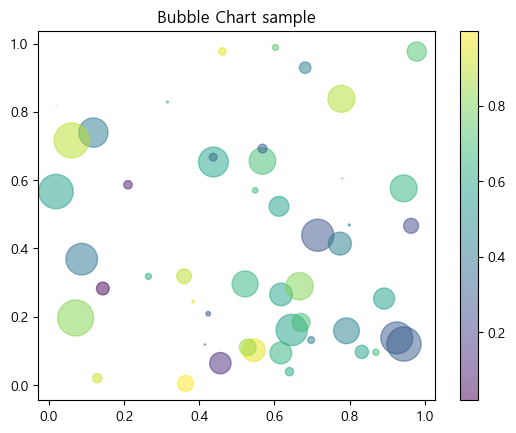

In [33]:
plt.scatter(x, y1, c=y2, s=y3, alpha=0.5)
plt.title('Bubble Chart sample')
plt.colorbar()
plt.show()

=> 산점도를 그린 후 colorbar()를 생성하여 색상 정보를 막대로 표현

#### auto 데이터셋

In [71]:
auto = pd.read_csv('data/auto_mpg.csv', header=None)
auto.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [72]:
auto.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'accel', 'model_year', 'origin', 'car_name']
auto.head()

,mpg,cylinders,displacement,horsepower,weight,accel,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [73]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   accel         398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


#### auto데이터셋 : 산점도

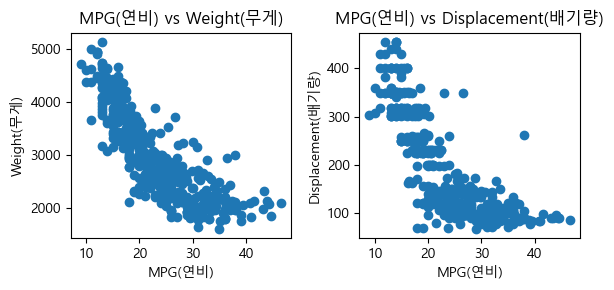

In [42]:
fig, axes = plt.subplots(1,2, figsize=(6,3), tight_layout=True)
axes[0].scatter(auto.mpg, auto.weight)
axes[0].set_xlabel('MPG(연비)')
axes[0].set_ylabel('Weight(무게)')
axes[0].set_title('MPG(연비) vs Weight(무게)')
axes[1].scatter(auto.mpg, auto.displacement)
axes[1].set_xlabel('MPG(연비)')
axes[1].set_ylabel('Displacement(배기량)')
axes[1].set_title('MPG(연비) vs Displacement(배기량)')
plt.show()

In [44]:
auto.cylinders.value_counts().sort_index()

cylinders
3      4
4    204
5      3
6     84
8    103
Name: count, dtype: int64

In [45]:
auto.cylinders = auto.cylinders.astype('category')
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    category
 2   displacement  398 non-null    float64 
 3   horsepower    398 non-null    object  
 4   weight        398 non-null    float64 
 5   accel         398 non-null    float64 
 6   model_year    398 non-null    int64   
 7   origin        398 non-null    int64   
 8   car_name      398 non-null    object  
dtypes: category(1), float64(4), int64(2), object(2)
memory usage: 25.6+ KB


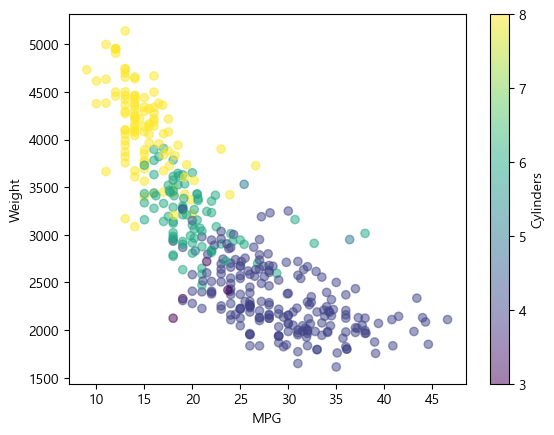

In [47]:
plt.scatter(x=auto.mpg, y=auto.weight, c=auto.cylinders, alpha=0.5)
plt.xlabel('MPG')
plt.ylabel('Weight')
plt.colorbar(label='Cylinders')
plt.show()

#### matplotlib의 colormap()
- 색상 팔레트 설정

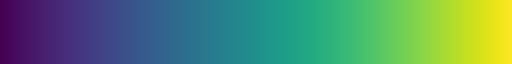

In [48]:
plt.get_cmap()

In [49]:
plt.set_cmap(plt.spring())

<Figure size 640x480 with 0 Axes>

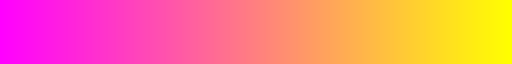

In [50]:
plt.get_cmap()

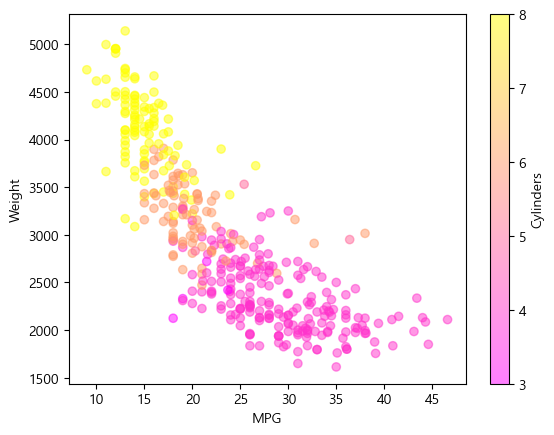

In [51]:
plt.scatter(x=auto.mpg, y=auto.weight, c=auto.cylinders, alpha=0.5)
plt.xlabel('MPG')
plt.ylabel('Weight')
plt.colorbar(label='Cylinders')
plt.show()

- https://matplotlib.org/stable/gallery/color/colormap_reference.html
- cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic',
            'berlin', 'managua', 'vanimo']),
         ('Cyclic', ['twilight', 'twilight_shifted', 'hsv']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral',
            'gist_ncar'])]

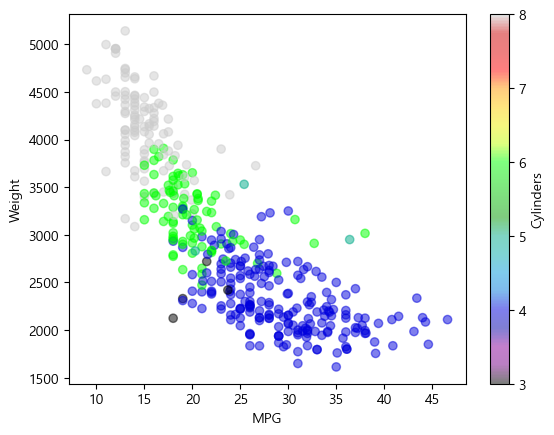

In [78]:
plt.scatter(x=auto.mpg, y=auto.weight, c=auto.cylinders, alpha=0.5, cmap='nipy_spectral')
plt.xlabel('MPG')
plt.ylabel('Weight')
plt.colorbar(label='Cylinders')
plt.show()

## 3. 히스토그램 : hist()

- 연속형 수치형 데이터의 분포 시각화
- 참고. 막대그래프는 범주형 데이터의 빈도(비율) 분포 시각화

- 형식. matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)


https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

#### 데이터생성

In [14]:
np.random.seed(0)
x = np.random.randn(1000)

#### 히스토그램 그리기

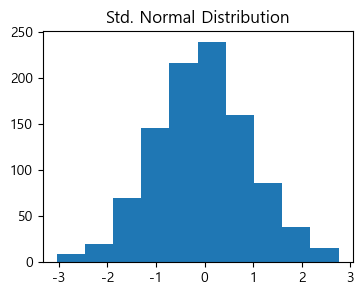

In [15]:
plt.figure(figsize=(4,3))
plt.hist(x)
plt.title('Std. Normal Distribution')
plt.show()

In [16]:
x_df = pd.DataFrame(x, columns=['X'])
x_df.describe()

,X
count,1000.000000
mean,-0.045257
std,0.987527
min,-3.046143
25%,-0.698420
50%,-0.058028
75%,0.606951
max,2.759355


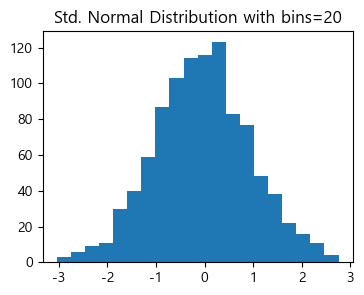

In [17]:
plt.figure(figsize=(4,3))
plt.hist(x, bins=20)
plt.title('Std. Normal Distribution with bins=20')
plt.show()

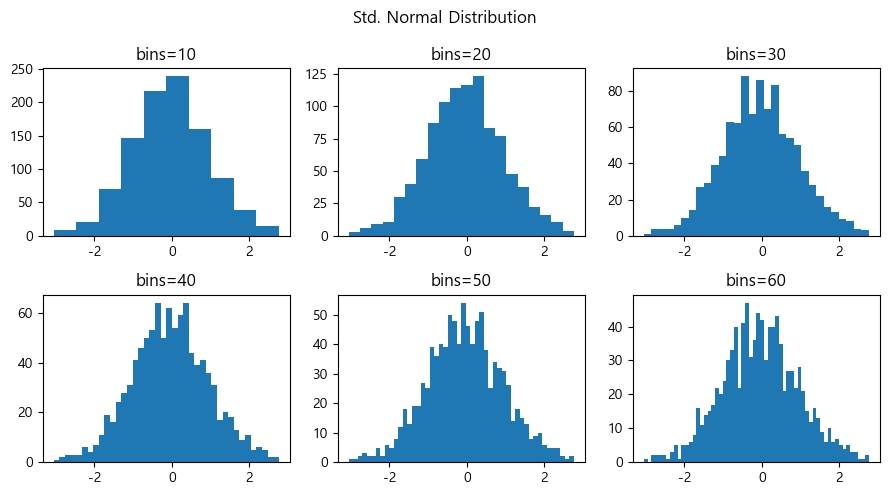

In [18]:
bins=[10,20,30,40,50,60]
fig, axes = plt.subplots(2,3 ,figsize=(9,5))
plt.suptitle('Std. Normal Distribution')
ncols = 3
for i, bn in enumerate(bins):
    r = i // ncols
    c = i % ncols
    axes[r,c].hist(x, bins=bn)
    axes[r,c].set_title(f'bins={bn}')
plt.tight_layout()
plt.show()

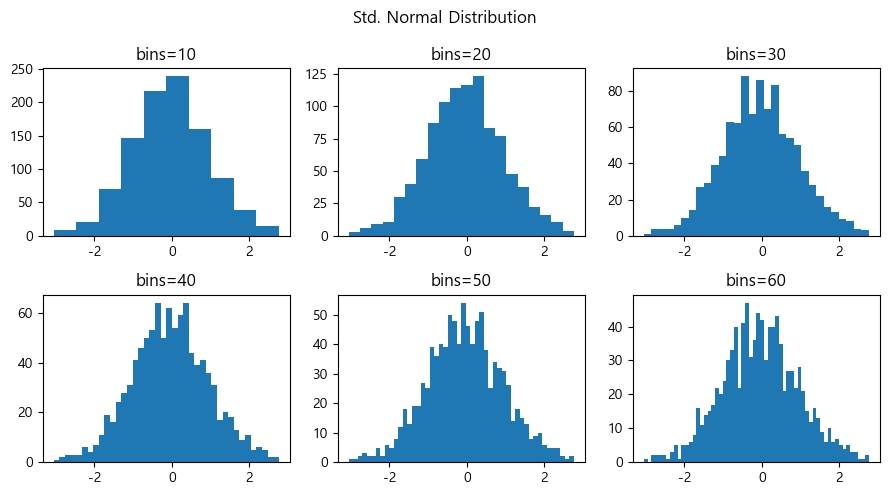

In [19]:
bins=[10,20,30,40,50,60]
fig, axes = plt.subplots(2,3 ,figsize=(9,5))
plt.suptitle('Std. Normal Distribution')
for i in range(len(bins)):
    axes[i//3,i%3].hist(x, bins=bins[i])
    axes[i//3,i%3].set_title(f'bins={bins[i]}')
plt.tight_layout()
plt.show()

- hist()의 반환값 : n, bins, patches
- n: 게급구간별 관측치 개수
- bins : 계급구간 범위
- patches : patch 객체

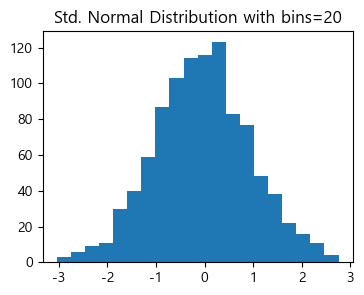

n:[  3.   6.   9.  11.  30.  40.  59.  87. 103. 114. 116. 123.  83.  77.
  48.  38.  22.  16.  11.   4.]
bins:[-3.04614305 -2.75586815 -2.46559324 -2.17531833 -1.88504342 -1.59476851
 -1.3044936  -1.0142187  -0.72394379 -0.43366888 -0.14339397  0.14688094
  0.43715585  0.72743075  1.01770566  1.30798057  1.59825548  1.88853039
  2.1788053   2.46908021  2.75935511]
patches:<BarContainer object of 20 artists>


In [21]:
plt.figure(figsize=(4,3))
n, bins, patches = plt.hist(x, bins=20)
plt.title('Std. Normal Distribution with bins=20')
plt.show()
print(f'n:{n}')
print(f'bins:{bins}')
print(f'patches:{patches}')

#### hist()의 destiny 인수
- y축을 빈도수(frequency)가 아닌 상대빈도(비율)로 지정

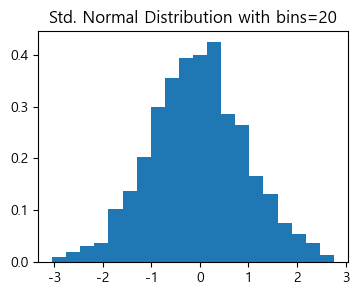

In [23]:
plt.figure(figsize=(4,3))
plt.hist(x, bins=20, density=True)
plt.title('Std. Normal Distribution with bins=20')
plt.show()

#### hist()의 facecolor, alpha인수
- facecolor : 색상
- alpha : 불투명도, 0~1사이의 값, 0에 가까울수록 투명해짐

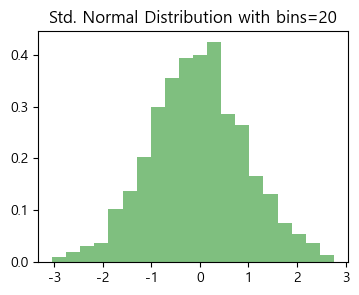

In [24]:
plt.figure(figsize=(4,3))
plt.hist(x, bins=20, density=True, facecolor='green', alpha=0.5)
plt.title('Std. Normal Distribution with bins=20')
plt.show()

#### auto 데이터셋

In [107]:
auto = pd.read_csv('data/auto_mpg.csv', header=None)
auto.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'accel', 'model_year', 'origin', 'car_name']
auto.cylinders = auto.cylinders.astype('category')

In [108]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    category
 2   displacement  398 non-null    float64 
 3   horsepower    398 non-null    object  
 4   weight        398 non-null    float64 
 5   accel         398 non-null    float64 
 6   model_year    398 non-null    int64   
 7   origin        398 non-null    int64   
 8   car_name      398 non-null    object  
dtypes: category(1), float64(4), int64(2), object(2)
memory usage: 25.6+ KB


In [109]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,accel,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [110]:
auto[auto.horsepower == '?']

,mpg,cylinders,displacement,horsepower,weight,accel,model_year,origin,car_name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [111]:
auto.loc[auto.horsepower == '?', 'horsepower'] = np.nan

In [112]:
auto.horsepower.unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', nan, '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [113]:
auto.horsepower = auto.horsepower.astype('float')

In [115]:
auto.horsepower = auto.horsepower.fillna(auto.horsepower.mean())

In [117]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    category
 2   displacement  398 non-null    float64 
 3   horsepower    398 non-null    float64 
 4   weight        398 non-null    float64 
 5   accel         398 non-null    float64 
 6   model_year    398 non-null    int64   
 7   origin        398 non-null    int64   
 8   car_name      398 non-null    object  
dtypes: category(1), float64(5), int64(2), object(1)
memory usage: 25.6+ KB


#### 히스토그램 그리기

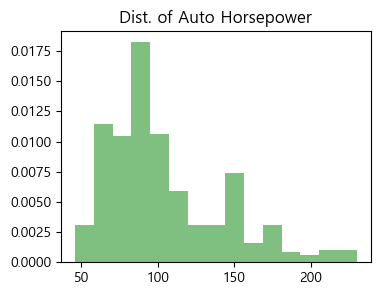

In [118]:
plt.figure(figsize=(4,3))
plt.hist(auto.horsepower, bins=15, density=True, facecolor='green', alpha=0.5)
plt.title('Dist. of Auto Horsepower')
plt.show()

#### 문제. 

auto-mpg 데이터셋에서 4개의 변수('mpg', 'cylinders', 'displacement', 'weight')에 대한 히스토그램을 한 그림에 그리기

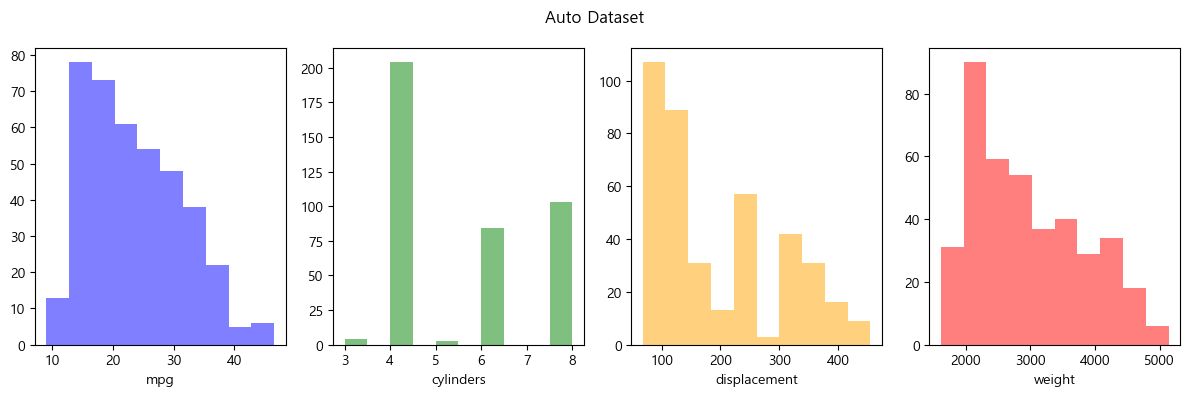

In [120]:
nrows, ncols = 1,4
colnames = ['mpg', 'cylinders', 'displacement', 'weight']
colors = ['b', 'g', 'orange', 'red']

fig, axes = plt.subplots(nrows,ncols,figsize=(12,4), tight_layout=True)
plt.suptitle('Auto Dataset')

for i, col in enumerate(colnames):
    axes[i].hist(auto[col], facecolor=colors[i], alpha=0.5)
    axes[i].set_xlabel(col)
plt.show()


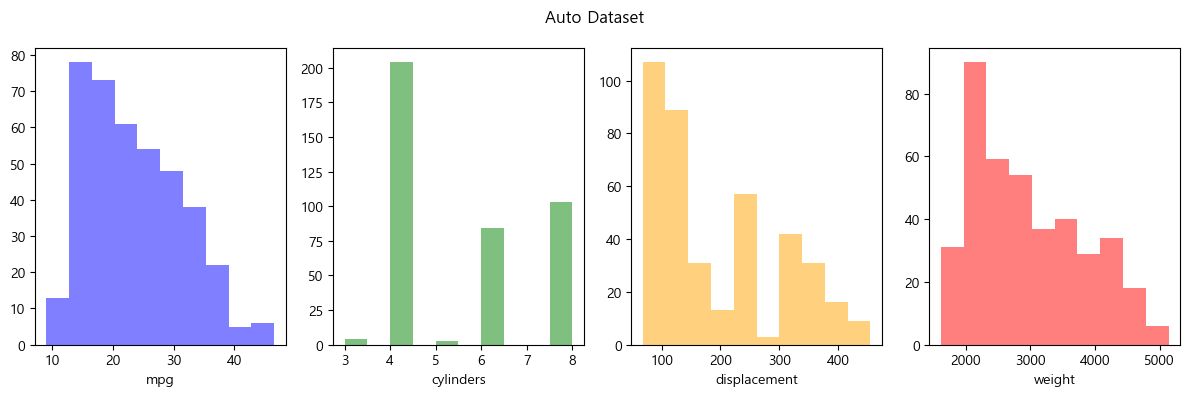

In [122]:
nrows, ncols = 1,4
colnames = ['mpg', 'cylinders', 'displacement', 'weight']
colors = ['b', 'g', 'orange', 'red']

fig, axes = plt.subplots(nrows,ncols,figsize=(12,4), tight_layout=True)
plt.suptitle('Auto Dataset')

for r in range(nrows):
    for c in range(ncols):
        i = ncols*r + c 
        col = colnames[i]
        axes[i].hist(auto[col], facecolor=colors[i], alpha=0.5)
        axes[i].set_xlabel(col)
plt.show()


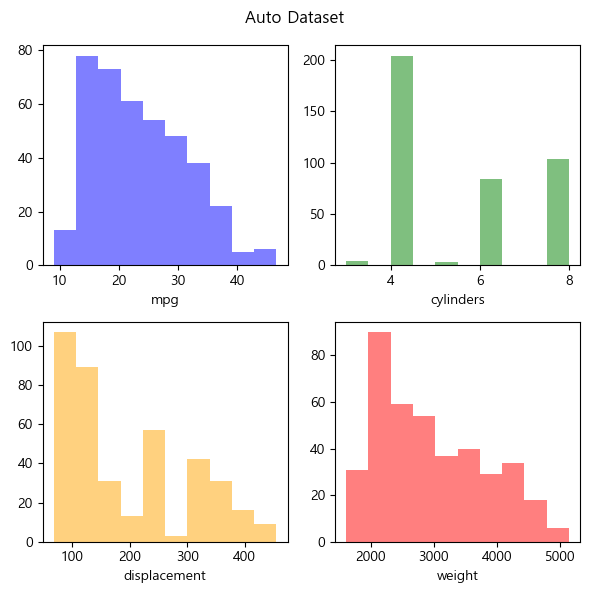

In [126]:
nrows, ncols = 2,2
colnames = ['mpg', 'cylinders', 'displacement', 'weight']
colors = ['b', 'g', 'orange', 'red']

fig, axes = plt.subplots(nrows,ncols,figsize=(6,6), tight_layout=True)
plt.suptitle('Auto Dataset')

for r in range(nrows):
    for c in range(ncols):
        i = ncols*r + c 
        col = colnames[i]
        axes[r,c].hist(auto[col], facecolor=colors[i], alpha=0.5)
        axes[r,c].set_xlabel(col)
plt.show()

#### 비대칭인 자료를 대칭으로 로그변환  ༼◉_◉ ༽ ᕙ༼ ≖ᴥ≖༽ᕗ

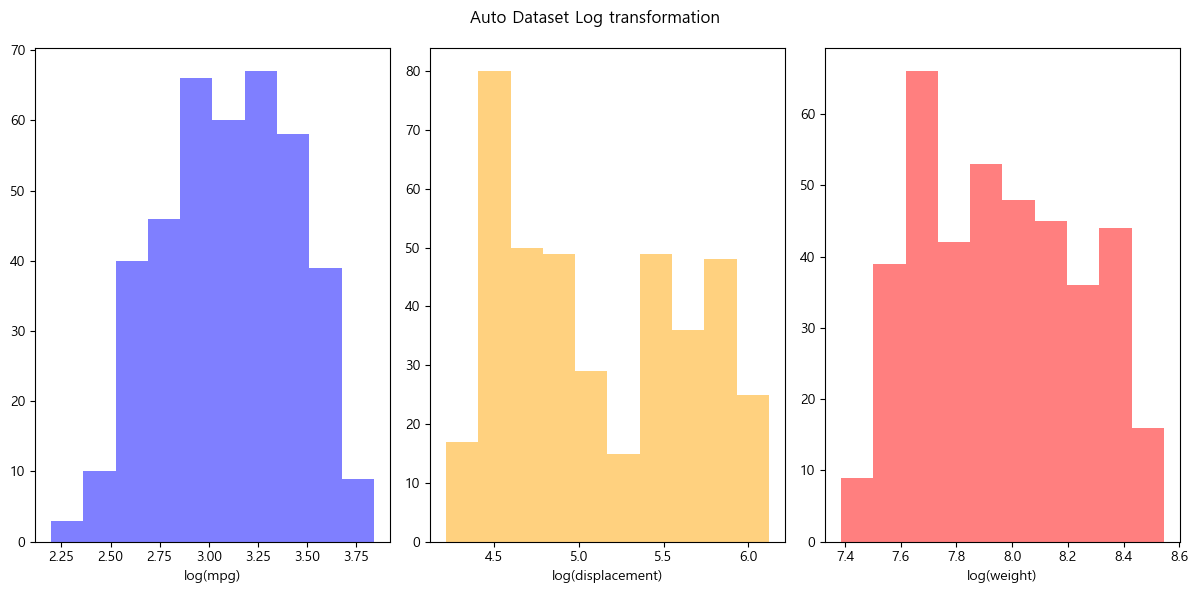

In [130]:
nrows, ncols = 1,3
colnames = ['mpg', 'displacement', 'weight']
colors = ['b', 'orange', 'red']

fig, axes = plt.subplots(nrows,ncols,figsize=(12,6), tight_layout=True)
plt.suptitle('Auto Dataset Log transformation')

for i, col in enumerate(colnames):
    r = i // ncols
    c = i % ncols
    axes[i].hist(np.log(auto[col]), facecolor=colors[i], alpha=0.5)
    axes[i].set_xlabel(f'log({col})')
plt.show()

## 4. 박스플롯 : boxplot()

- 데이터의 분포를 파악해주는 플롯
    - 최소값, 제1사분위수, 중위수, 제3사분위수, 최대값
    
- 이상치 데이터 탐색을 위해 사용

- 형식 : matplotlib.pyplot.boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None, capwidths=None, *, data=None)[source]



https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

#### 데이터생성

In [132]:
s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)

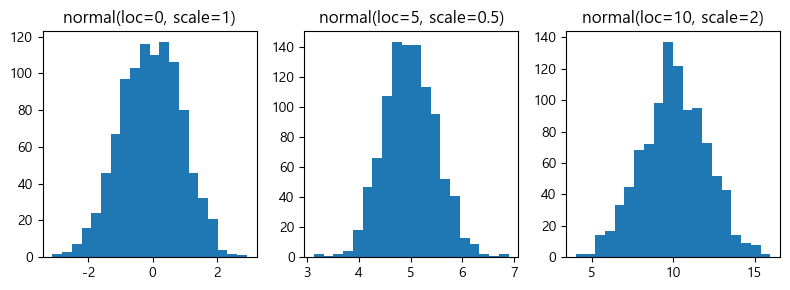

In [134]:
fig, axes = plt.subplots(1,3, figsize=(8,3), tight_layout=True)
axes[0].hist(s1, bins=20)
axes[0].set_title('normal(loc=0, scale=1)')
axes[1].hist(s2, bins=20)
axes[1].set_title('normal(loc=5, scale=0.5)')
axes[2].hist(s3, bins=20)
axes[2].set_title('normal(loc=10, scale=2)')
plt.show()

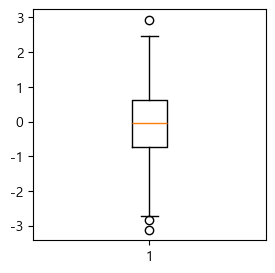

In [137]:
plt.figure(figsize=(3,3))
plt.boxplot(s1)
plt.show()

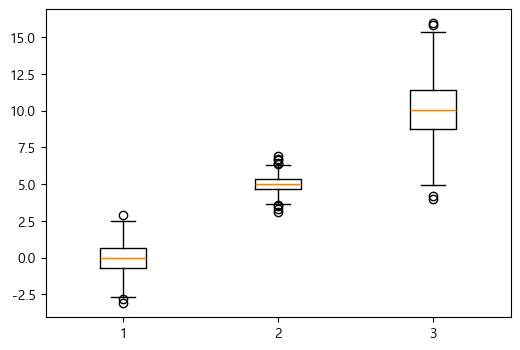

In [135]:
plt.figure(figsize=(6,4))
plt.boxplot((s1, s2, s3))
plt.show()

#### auto 데이터셋의 'mpg', 'cylinders', 'displacement', 'weight'

In [145]:
cols = ['mpg', 'cylinders', 'displacement', 'weight']
auto[cols].describe(include='all')

,mpg,cylinders,displacement,weight
count,398.000000,398.0,398.000000,398.000000
unique,NaN,5.0,NaN,NaN
top,NaN,4.0,NaN,NaN
freq,NaN,204.0,NaN,NaN
mean,23.514573,NaN,193.425879,2970.424623
std,7.815984,NaN,104.269838,846.841774
min,9.000000,NaN,68.000000,1613.000000
25%,17.500000,NaN,104.250000,2223.750000
50%,23.000000,NaN,148.500000,2803.500000
75%,29.000000,NaN,262.000000,3608.000000


#### boxplot

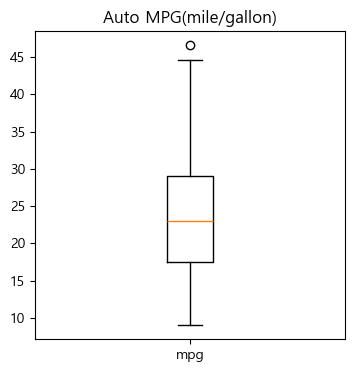

In [142]:
plt.figure(figsize=(4,4))
plt.boxplot(auto.mpg)
plt.title('Auto MPG(mile/gallon)')
plt.xticks([1], ['mpg'])
plt.show()

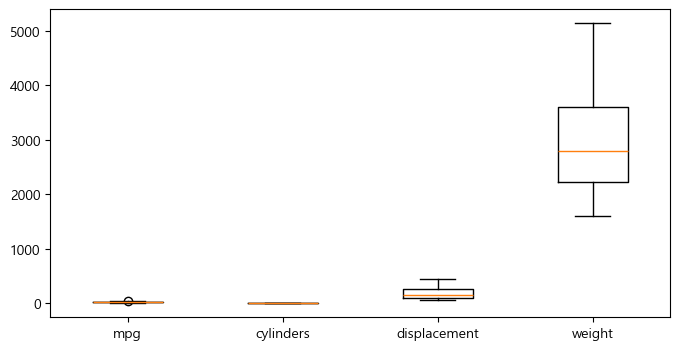

In [143]:
plt.figure(figsize=(8,4))
plt.boxplot(auto[cols])
plt.xticks([1,2,3,4], cols)
plt.show()

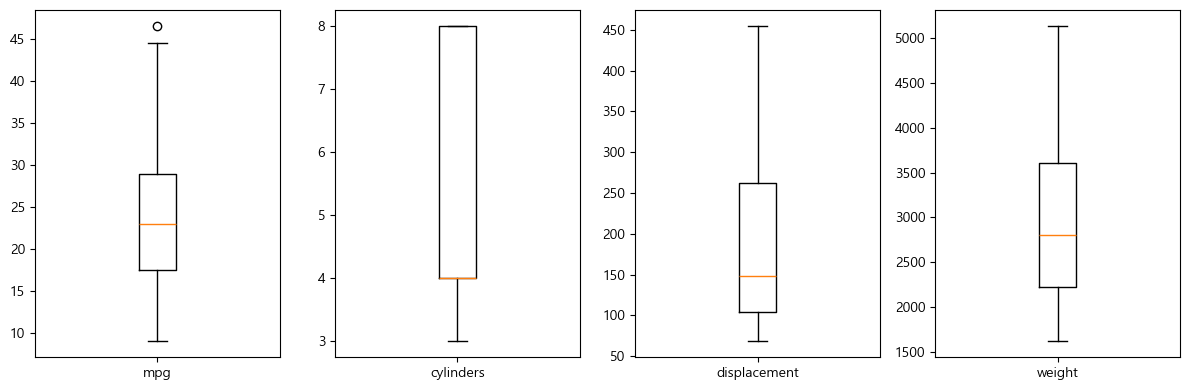

In [149]:
fig, axes = plt.subplots(1,4, figsize=(12,4), tight_layout=True)
for i, col in enumerate(cols):
    axes[i].boxplot(auto[col])
    # axes[i].set_title(col)
    axes[i].set_xticks([1],[col])
plt.show()

#### origin의 값에 따른 mpg의 박스플롯

In [150]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    category
 2   displacement  398 non-null    float64 
 3   horsepower    398 non-null    float64 
 4   weight        398 non-null    float64 
 5   accel         398 non-null    float64 
 6   model_year    398 non-null    int64   
 7   origin        398 non-null    int64   
 8   car_name      398 non-null    object  
dtypes: category(1), float64(5), int64(2), object(1)
memory usage: 25.6+ KB


In [151]:
auto.origin.value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

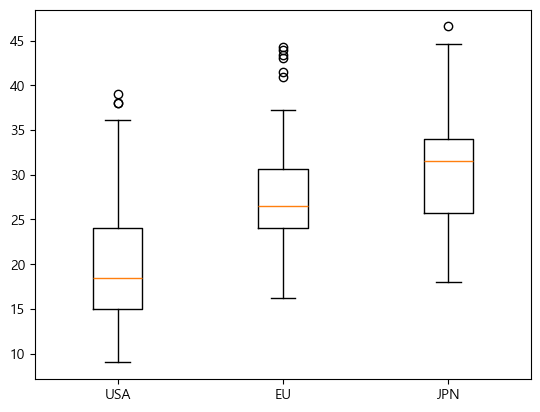

In [156]:
plt.boxplot([auto[auto.origin==1].mpg, 
             auto[auto.origin==2].mpg, 
             auto[auto.origin==3].mpg], 
            tick_labels = ['USA', 'EU', 'JPN'])
# plt.xticks([1,2,3],['USA', 'EU', 'JPN'])
plt.show()

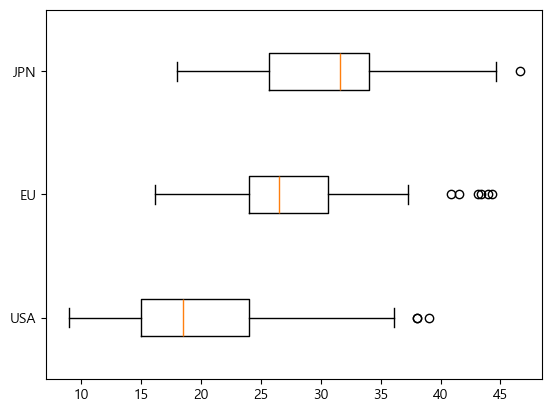

In [157]:
plt.boxplot([auto[auto.origin==1].mpg, 
             auto[auto.origin==2].mpg, 
             auto[auto.origin==3].mpg], 
            tick_labels = ['USA', 'EU', 'JPN'], vert=False)
# plt.xticks([1,2,3],['USA', 'EU', 'JPN'])
plt.show()

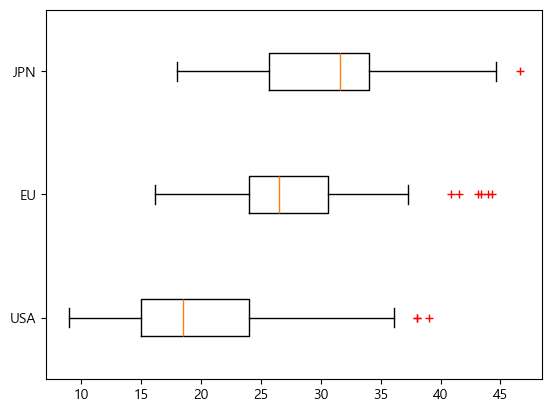

In [159]:
plt.boxplot([auto[auto.origin==1].mpg, 
             auto[auto.origin==2].mpg, 
             auto[auto.origin==3].mpg], 
            tick_labels = ['USA', 'EU', 'JPN'], vert=False, sym='r+')
# plt.xticks([1,2,3],['USA', 'EU', 'JPN'])
plt.show()

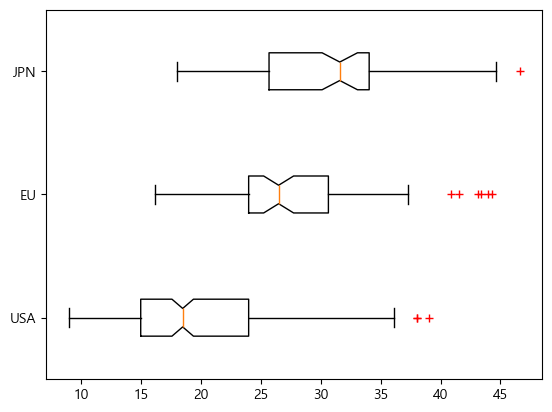

In [160]:
plt.boxplot([auto[auto.origin==1].mpg, 
             auto[auto.origin==2].mpg, 
             auto[auto.origin==3].mpg], 
            tick_labels = ['USA', 'EU', 'JPN'], vert=False, sym='r+', notch=True)
# plt.xticks([1,2,3],['USA', 'EU', 'JPN'])
plt.show()

#### 문제. origin의 값에 따른 weight의 박스플롯과 displacement의 박스플롯 한 그림 내에 그리기

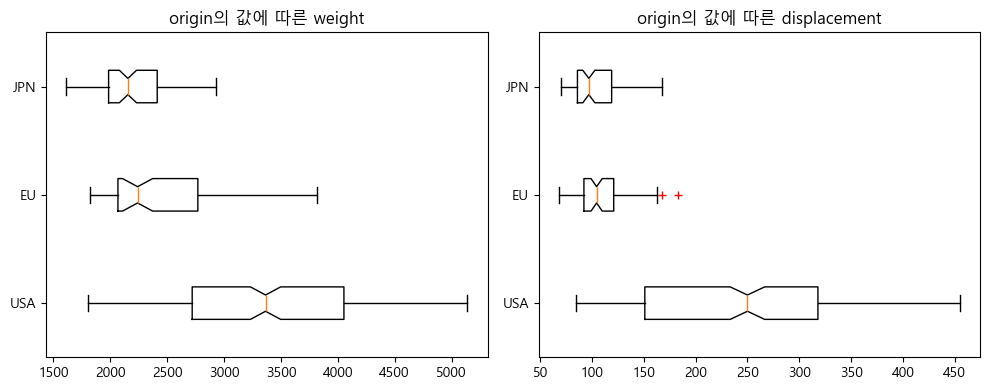

In [165]:
fig, axes = plt.subplots(1,2, figsize=(10,4), tight_layout=True)
axes[0].boxplot([auto[auto.origin==1].weight, 
             auto[auto.origin==2].weight, 
             auto[auto.origin==3].weight], 
            tick_labels = ['USA', 'EU', 'JPN'], vert=False, sym='r+', notch=True)
axes[0].set_title('origin의 값에 따른 weight')
axes[1].boxplot([auto[auto.origin==1].displacement, 
             auto[auto.origin==2].displacement, 
             auto[auto.origin==3].displacement], 
            tick_labels = ['USA', 'EU', 'JPN'], vert=False, sym='r+', notch=True)
axes[1].set_title('origin의 값에 따른 displacement')
# plt.xticks([1,2,3],['USA', 'EU', 'JPN'])
plt.show()

- boxplot()의 notch : 중앙값의 신뢰구간을 표시
- boxplot()의 showmeans=True : 평균값 표시

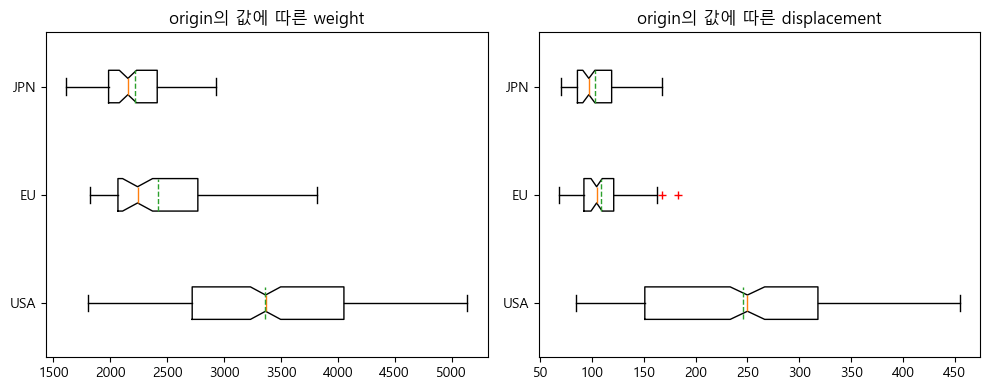

In [173]:
cols = ['weight', 'displacement']
fig, axes = plt.subplots(1,2, figsize=(10,4), tight_layout=True)
for i, col in enumerate(cols):
    axes[i].boxplot([auto[auto.origin==1][col], 
             auto[auto.origin==2][col], 
             auto[auto.origin==3][col]], 
            tick_labels = ['USA', 'EU', 'JPN'], vert=False, sym='r+', notch=True, showmeans=True, meanline=True)
    axes[i].set_title(f'origin의 값에 따른 {col}')

## 5. 파이차트 : pie()

- 범주형 데이터의 빈도(비율)을 비교하기 위해 사용하는 차트
- 원의 형태를 유지할 수 있도록 다음 명령을 실행해야 함
    - plt.axis('equal')
    - 콘솔에서는 별 다른 변화 없으나 plot창에서는 필요함

- 형식 : matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None,  startangle=0, radius=1, ...)


https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html

#### 데이터셋

In [174]:
size=[15,20,45,30]
foods = ['김밥','김치찌게', '짜장면', '돈까스']

#### pie chart 그리기

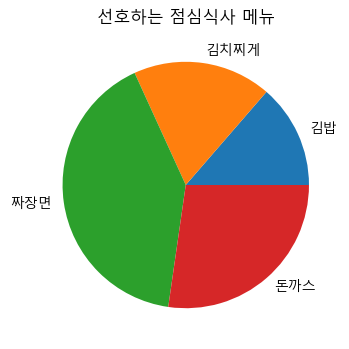

In [176]:
plt.figure(figsize=(4,4))
plt.pie(size, labels=foods)
plt.title('선호하는 점심식사 메뉴')
plt.show()

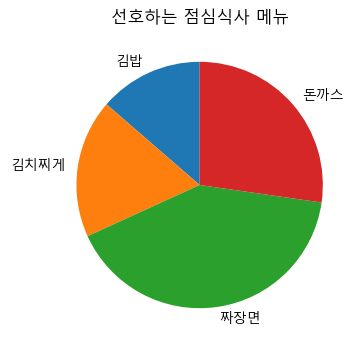

In [177]:
plt.figure(figsize=(4,4))
plt.pie(size, labels=foods, startangle=90)
plt.title('선호하는 점심식사 메뉴')
plt.show()

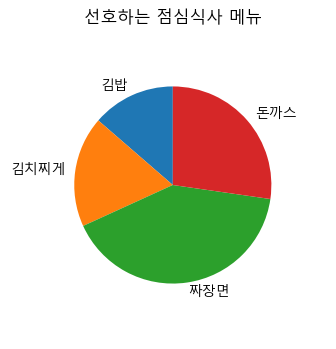

In [178]:
plt.figure(figsize=(4,4))
plt.pie(size, labels=foods, startangle=90, radius=0.8)
plt.title('선호하는 점심식사 메뉴')
plt.show()

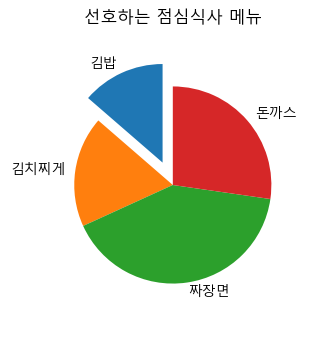

In [179]:
plt.figure(figsize=(4,4))
plt.pie(size, labels=foods, startangle=90, radius=0.8, explode=[0.2, 0, 0, 0])
plt.title('선호하는 점심식사 메뉴')
plt.show()

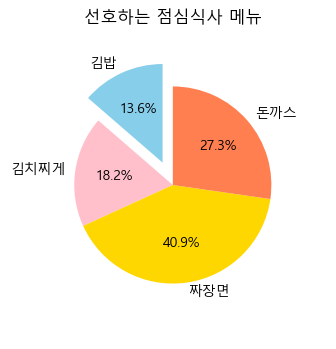

In [185]:
plt.figure(figsize=(4,4))
plt.pie(size, labels=foods, startangle=90, radius=0.8, explode=[0.2, 0, 0, 0], autopct='%.1f%%', colors=['skyblue', 'pink', 'gold', 'coral'])
plt.title('선호하는 점심식사 메뉴')
plt.show()

#### 문제. auto 데이터셋에서  cylinders, origin에 대한 pie 표현

In [193]:
cylinders = auto.cylinders.value_counts().sort_index()
origin = auto.origin.value_counts().sort_index()
origin

origin
1    249
2     70
3     79
Name: count, dtype: int64

In [5]:
cols = ['cylinders','origin']
fig, axes = plt.subplots(1,2, figsize=(6,3), tight_layout=True)
for i, col in enumerate(cols):
    cnt = auto[col].value_counts().sort_index()
    axes[i].pie(cnt, labels=cnt.index, startangle=90, autopct='%.1f%%')
    axes[i].set_title(col)
    axes[i].legend()
plt.show()

NameError: name 'plt' is not defined

### 6. 영역그래프(area plot)
- 선그래프로 구현한 결과에서 선그래프와 X축 사이의 공간에 색을 입혀 표현
- pyplot.fill_between(x, y1, y2=0,...)을 사용
    - 두 수평커브 사이의 영역을 채움
- pyplot.fill_betweenx(y, x1, x2=0,...)을 사용
    - 두 수직커브 사이의 영역을 채움

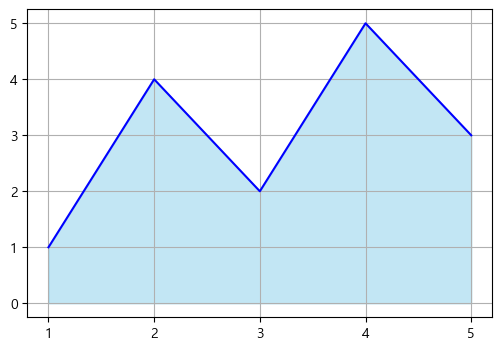

In [200]:
x = [1,2,3,4,5]
y = [1,4,2,5,3]

plt.figure(figsize=(6,4))
plt.fill_between(x,y, color='skyblue', alpha=0.5)
plt.plot(x,y,color='blue')
plt.xticks(x,x)
plt.grid(True)
plt.show()

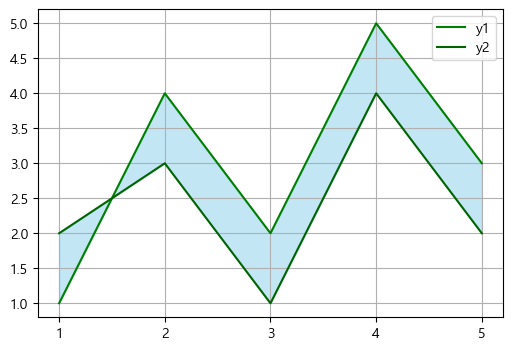

In [202]:
x = [1,2,3,4,5]
y1 = [1,4,2,5,3]
y2 = [2,3,1,4,2]

plt.figure(figsize=(6,4))
plt.fill_between(x,y1, y2, color='skyblue', alpha=0.5)
plt.plot(x,y1,color='g', label='y1')
plt.plot(x,y2,color='darkgreen', label='y2')
plt.xticks(x,x)
plt.grid(True)
plt.legend()
plt.show()

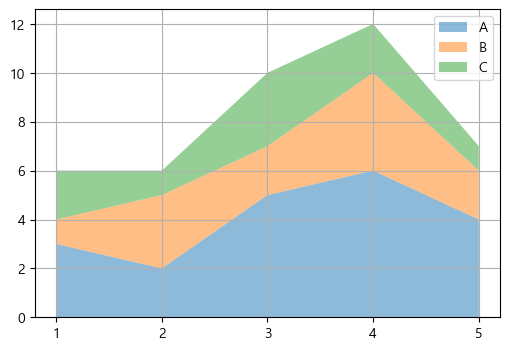

In [203]:
x = [1,2,3,4,5]
y1 = [3,2,5,6,4]
y2 = [1,3,2,4,2]
y3 = [2,1,3,2,1]

plt.figure(figsize=(6,4))
plt.stackplot(x, y1, y2, y3, labels=['A', 'B', 'C'], alpha=0.5)
plt.xticks(x,x)
plt.grid(True)
plt.legend()
plt.show()

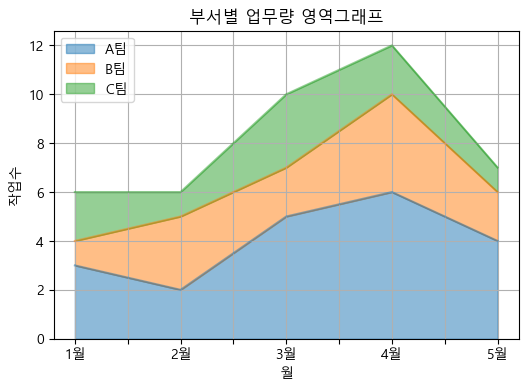

In [207]:
data = pd.DataFrame({'월':['1월','2월','3월','4월','5월'],
                     'A팀':[3,2,5,6,4],
                     'B팀':[1,3,2,4,2],
                     'C팀':[2,1,3,2,1]})
data.set_index('월', inplace=True)
                     
data.plot(kind='area', stacked=True, alpha=0.5, figsize=(6,4), 
              title='부서별 업무량 영역그래프', xlabel='월', ylabel='작업수')
plt.grid(True)
plt.legend()
plt.show()

### 실습문제.
#### 서울시에서 강원도, 충청남도, 경상북도, 전라남도로 전입한 인구이동에 대한 영역그래프 그리기
- 데이터셋 : 1970년~2022년까지 시도별 전출/전입 이동자 현황

In [5]:
data = pd.read_excel('data/전출지전입지_시도별이동자수_2022.xlsx', index_col=[0,1])

In [6]:
df_seoul = data.loc['서울특별시']

In [243]:
d1 = df_seoul.loc['강원도'].astype(int)
d2 = df_seoul.loc['충청남도'].astype(int)
d3 = df_seoul.loc['경상북도'].astype(int)
d4 = df_seoul.loc['전라남도'].astype(int)

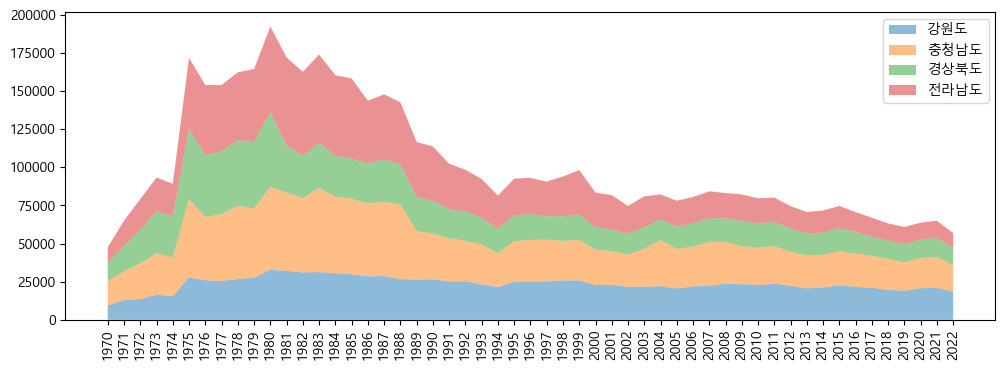

In [249]:
x = d1.index
plt.figure(figsize=(12,4))
plt.stackplot(x, d1, d2, d3, d4, labels=['강원도', '충청남도', '경상북도', '전라남도'], alpha=0.5)
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [7]:
data = df_seoul.loc[['강원도', '충청남도', '경상북도', '전라남도']]
data.head()
data.astype(int)
data = data.T

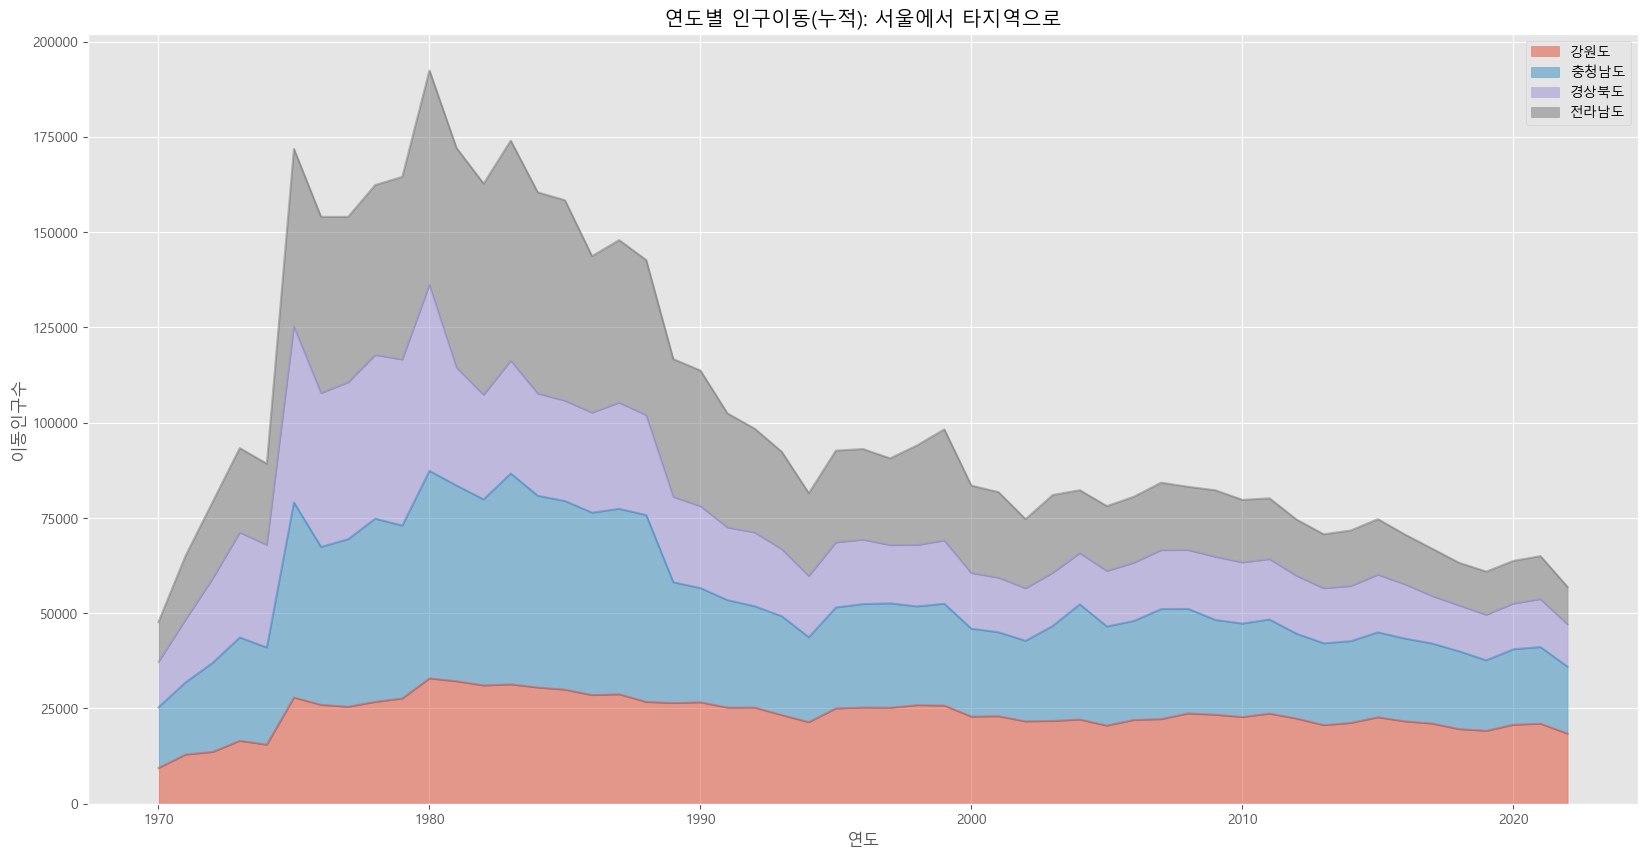

In [14]:
plt.style.use('ggplot')
data.plot(kind='area', stacked=True, alpha=0.5, figsize=(20,10), 
              title='연도별 인구이동(누적): 서울에서 타지역으로',
             xlabel = '연도', ylabel='이동인구수')
plt.legend()
plt.show()

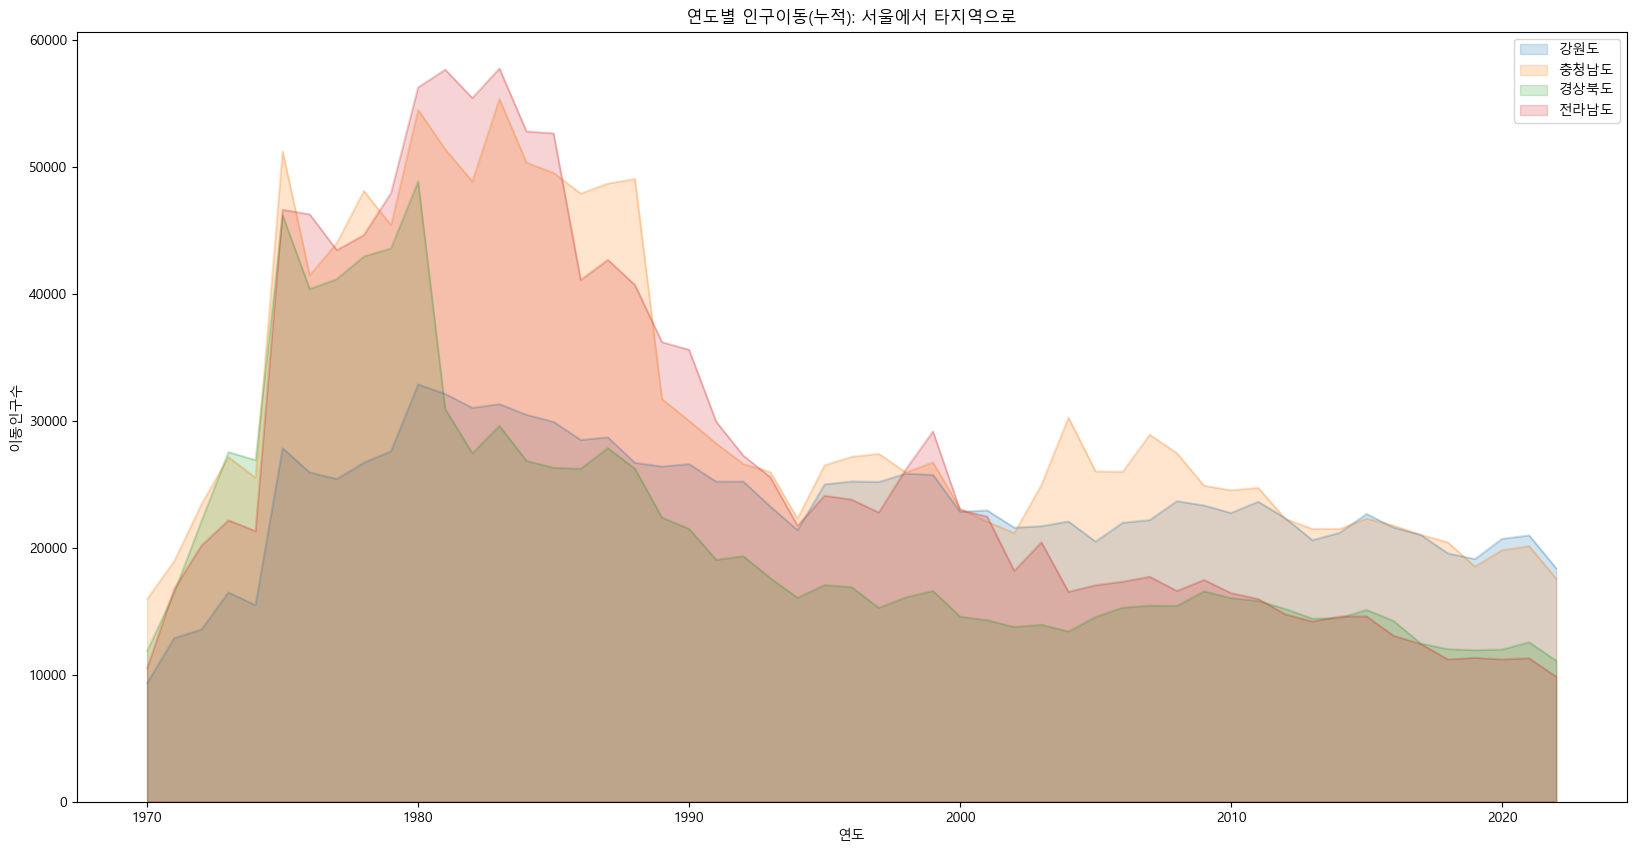

In [12]:
data.plot(kind='area', stacked=False, alpha=0.2, figsize=(20,10), 
              title='연도별 인구이동(누적): 서울에서 타지역으로',
             xlabel = '연도', ylabel='이동인구수')
plt.legend()
plt.show()

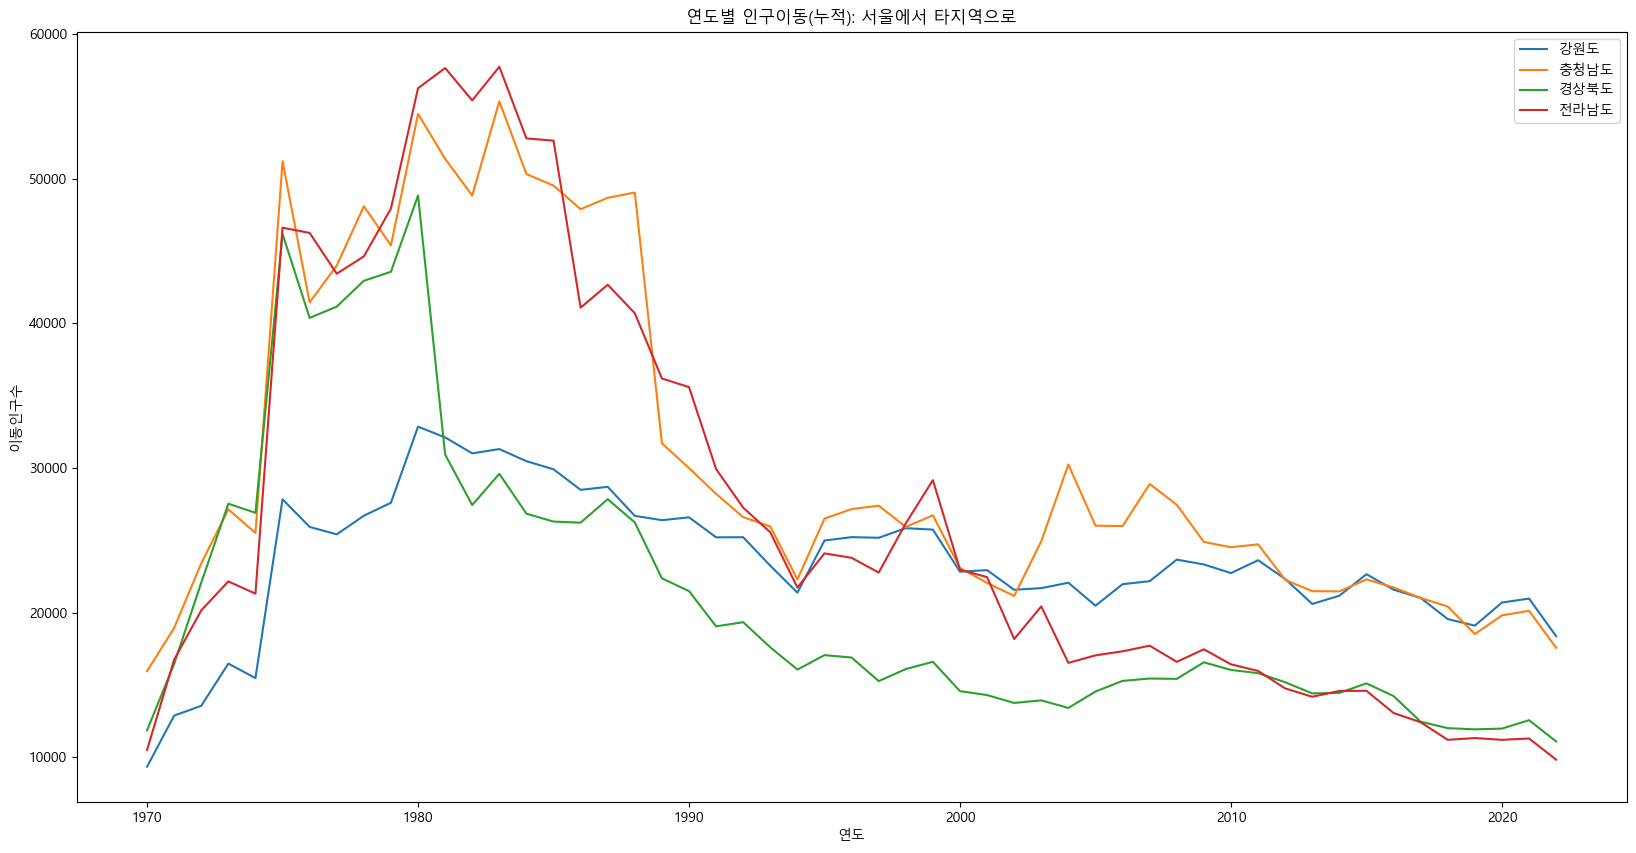

In [13]:
data.plot(kind='line', figsize=(20,10), 
              title='연도별 인구이동(누적): 서울에서 타지역으로',
             xlabel = '연도', ylabel='이동인구수')
plt.legend()
plt.show()

-----